In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/titanic.csv')

In [3]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,NaN,C
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.500,NaN,S
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.000,NaN,S


In [4]:
print(f"El shape del conjunto de entrenamiento es {df.shape}. {df.shape[0]} filas y {df.shape[1]} columnas.") 

El shape del conjunto de entrenamiento es (891, 12). 891 filas y 12 columnas.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


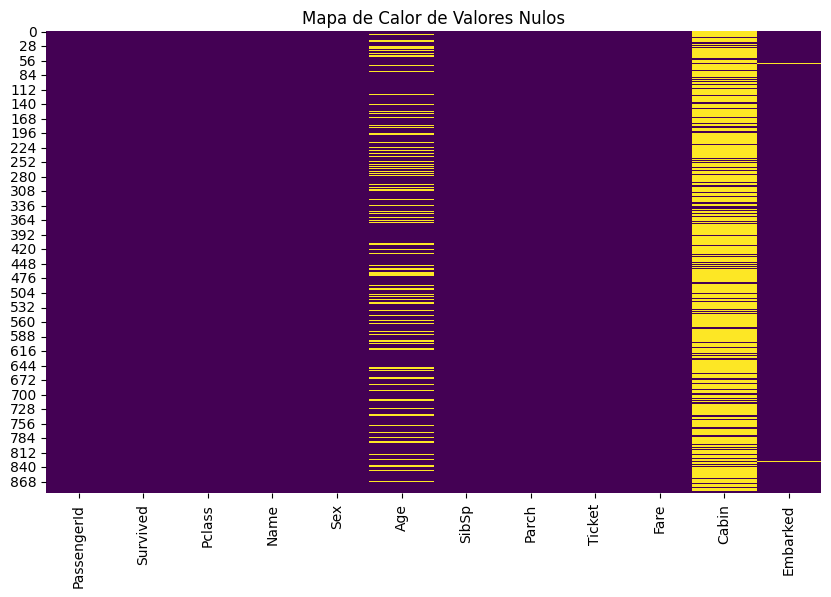

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa de Calor de Valores Nulos')

# Guardar el gráfico como un archivo PNG
plt.savefig('output.png', format='png')

# Mostrar el gráfico
plt.show()

In [7]:
missing_values_percentage = df.isnull().mean() * 100
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)
print(missing_values_percentage)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


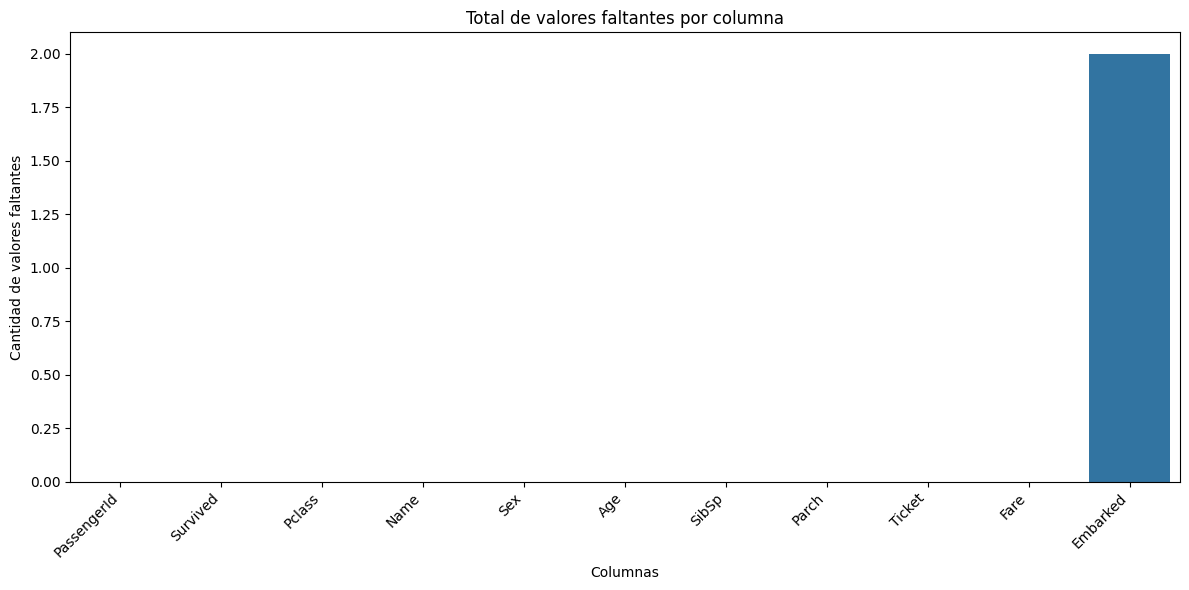

In [17]:
# Calcular valores faltantes por columna
missing_counts = df.isnull().sum()

# Crear gráfica de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)

plt.title("Total de valores faltantes por columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de valores faltantes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
# Eliminar Cabin (solo si existe)
df.drop(columns=['Cabin'], errors='ignore', inplace=True)

In [20]:
# Imputar Age con la mediana de forma recomendada
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [22]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('PassengerId', axis = 1, inplace = True)

In [27]:
print(f"Después de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.")

Después de limpiar df: 891 filas y 8 columnas.


In [28]:
df.to_csv('./data/titanic_clean.csv', index=False)